In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
%matplotlib inline

In [2]:
digits=load_digits()

In [3]:
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

<Figure size 432x288 with 0 Axes>

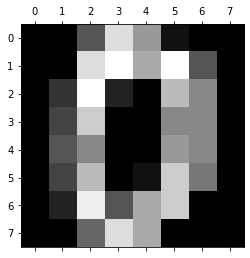

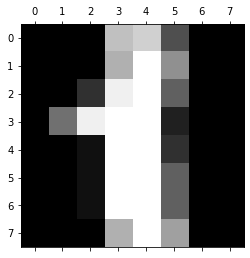

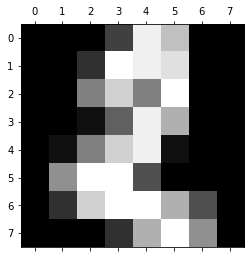

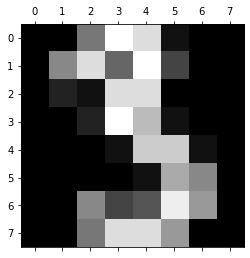

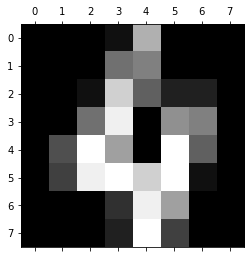

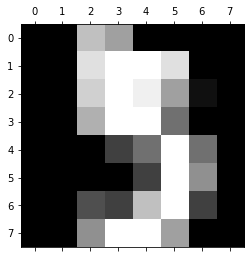

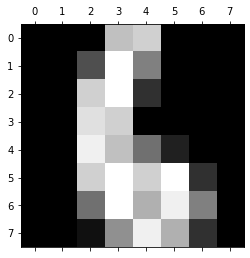

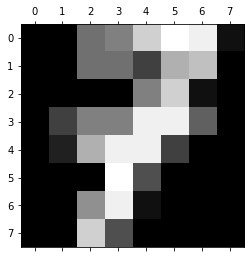

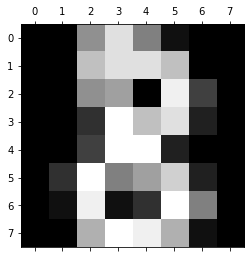

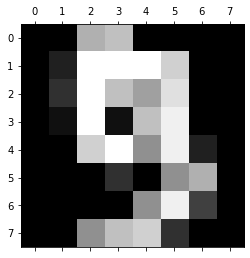

In [11]:

plt.gray()
for i in range(10):
    plt.matshow(digits.images[i])

In [12]:
df=pd.DataFrame(digits.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [6]:
df['target']=digits.target
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [7]:
X=df.drop(['target'],axis='columns')

In [8]:
y=df['target']

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [10]:
len(X_test)

360

In [13]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()

In [14]:
model.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [15]:
model.score(X_test,y_test)

0.9444444444444444

In [17]:
accuracy=[]
for i in range(10,30):
    model2=RandomForestClassifier(n_estimators=i)
    model.fit(X_train,y_train)
    accuracy.append(model.score(X_test,y_test))
    

In [18]:
accuracy

[0.9361111111111111,
 0.9222222222222223,
 0.9305555555555556,
 0.9444444444444444,
 0.9361111111111111,
 0.9333333333333333,
 0.9472222222222222,
 0.9222222222222223,
 0.95,
 0.9555555555555556,
 0.9444444444444444,
 0.9444444444444444,
 0.9555555555555556,
 0.9527777777777777,
 0.9305555555555556,
 0.9361111111111111,
 0.9388888888888889,
 0.95,
 0.9277777777777778,
 0.9472222222222222]

In [20]:
y_predicted=model.predict(X_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_predicted,y_test)
cm

array([[28,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 35,  1,  1,  2,  1,  1,  1,  1,  0],
       [ 0,  1, 30,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0, 40,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 36,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  2,  1, 33,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0, 34,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 43,  0,  1],
       [ 0,  0,  0,  1,  0,  0,  0,  0, 32,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1, 30]], dtype=int64)

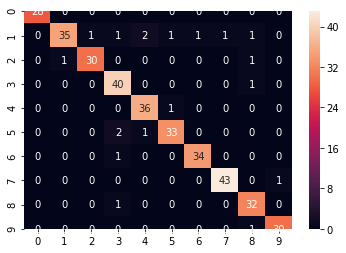

In [22]:
import seaborn as sns
sns.heatmap(cm,annot=True)